# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("The Muggle Sorting Hat DataSet.csv")
df1["Gender"] = df1["Gender"].str.replace(" ", "")
df1["District"] = df1["District"].str.replace(" ", "")
df1["Name"] = df1["Name"].str.replace(" ", "")
df1["Friend 1"] = df1["Friend 1"].str.replace(" ", "")
df1["Friend 2 "] = df1["Friend 2 "].str.replace(" ", "")
df1.rename(columns = {"Friend 2 ":"Friend 2"}, inplace = True)
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,BettyAllison,female,10,Pandora,MollyMeer,JessicaZebra
1,PeterAlexs,male,10,Limsa,G�ntherCohl,CeasarFeige
2,GregorAllmann,male,11,Pandora,BertEdamer,CeasarFeige
3,TiffanyBecks,female,10,Pandora,AllyInka,SallyBrot
4,SallyBrot,female,10,Limsa,TiffanyBecks,BettyAllison


In [2]:
#df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
#df1.head()

In [3]:
df1.describe()

,Age
count,80.000000
mean,10.112500
std,0.317974
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,11.000000


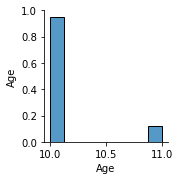

In [4]:
sns.pairplot(df1[["Age", "District", "Gender"]])

In [5]:
df1["District"].value_counts()

Pandora       19
Uldah         17
Limsa         15
Queensdale    11
Gridania      11
Reach          7
Name: District, dtype: int64

In [6]:
dic = {"Pandora" : "0", "Uldah" : "1", "Limsa" : "2", "Queensdale" : "3", "Gridania" : "4", "Reach" : "5"}
dic2 = {"female" : "0", "male" : "1"}

for old, new in dic.items():
    df1['District'] = df1['District'].str.replace(old, new, regex=False)

for old, new in dic2.items():
    df1['Gender'] = df1['Gender'].str.replace(old, new, regex=False)

df1['District'] = df1['District'].astype(int)
df1['Gender'] = df1['Gender'].astype(int)

In [7]:
df1.head()
df1["Gender"].value_counts()

1    41
0    39
Name: Gender, dtype: int64

## Clustering mall customer segmentation data

In [8]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df1[["District", "Gender"]])
kmeans.cluster_centers_

array([[ 7.72727273e-01,  7.27272727e-01],
       [ 4.38888889e+00,  5.55555556e-01],
       [ 2.33333333e+00,  1.00000000e+00],
       [-2.22044605e-16, -1.11022302e-16],
       [ 2.54545455e+00, -1.11022302e-16]])

In [9]:
df1["Clusters"] = kmeans.labels_
df1.head(10)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
1,PeterAlexs,1,10,2,G�ntherCohl,CeasarFeige,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,0
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,4
5,NancyClick,0,11,1,ZoeJutter,AmandaFredericks,0
6,G�ntherCohl,1,10,1,CeasarFeige,PeterAlexs,0
7,JohnnyCedar,1,10,4,MarvinGeige,LeoJackson,1
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,4
9,BertEdamer,1,10,1,PeterAlexs,G�ntherCohl,0


In [10]:
df1["Clusters"].value_counts()

0    22
1    18
2    15
3    14
4    11
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='District'>

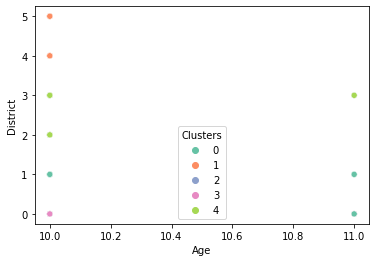

In [11]:
sns.scatterplot(data = df1, x = "Age", y = "District", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [12]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
#from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3
19,YuleHoffnung,0,10,0,ZoeJutter,AmandaFredericks,3
22,ZoeJutter,0,10,0,YuleHoffnung,SallyBrot,3
38,MollyMeer,0,11,0,MillyMucks,BettyAllison,3
40,MillyMucks,0,10,0,KatrinGreat,SandraNox,3
44,AlexaNymm,0,10,0,StacyNymm,VeraNyoa,3
45,StacyNymm,0,11,0,SteffieHorcrux,MathildaDamm,3


In [13]:
def split_dataframes(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = (-(-len(i)//splits))
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes(clustered_dataframes, 4)
split_clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3


In [14]:
"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 5)
diverse_groups[0].head(15)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3
25,HankKalt,1,10,3,BasOffen,ColeMaas,2
26,MaxKaal,1,11,3,AlexanderOdele,BillyNozzle,2
27,TrevorKehl,1,10,2,HankKalt,ColeMaas,2
35,ColeMaas,1,10,3,CarlosVives,BasOffen,2
36,ErnestoMadrigal,1,10,1,XanderMadrigal,KevinNicks,0
37,XanderMadrigal,1,10,1,ErnestoMadrigal,BillyNozzle,0


## Visualising diverse groups

In [15]:
group = diverse_groups[0]
#sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [16]:
for group_temp in diverse_groups:
    print(group_temp["Clusters"].value_counts())
    print(len(group_temp))

0    6
2    4
3    4
4    2
Name: Clusters, dtype: int64
16
1    5
0    4
2    4
3    4
Name: Clusters, dtype: int64
17
1    5
3    4
2    3
4    3
Name: Clusters, dtype: int64
15
0    6
1    5
4    3
3    2
Name: Clusters, dtype: int64
16
0    6
2    4
1    3
4    3
Name: Clusters, dtype: int64
16


Problem: Groups are too different in size!

## Creating diverse customer groups (different approach)

In [17]:
def sort_dataframe(df):
    df["Clusters"] = pd.Categorical(df["Clusters"], [0, 1, 2, 3, 4])
    sorted_dataframe = df.sort_values("Clusters")
    return sorted_dataframe

sort_dataframe(df1).head()

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
62,IndiPyrre,1,10,0,ArnoKrys,DavePulps,0
37,XanderMadrigal,1,10,1,ErnestoMadrigal,BillyNozzle,0
36,ErnestoMadrigal,1,10,1,XanderMadrigal,KevinNicks,0
34,BibiLydda,0,11,1,MaxieLooks,CiciLydda,0
33,CiciLydda,0,10,1,BibiLydda,MaxieLooks,0


## Keeping two customers together: merging rows before clustering
    

In [18]:
df2 = df1.drop("Clusters", axis=1)

def merge_customers1(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    average_age = (customer1.iloc[0,2] + customer2.iloc[0,2])/2
    average_income = (customer1.iloc[0,3] + customer2.iloc[0,3])/2
    average_spending_score = (customer1.iloc[0,4] + customer2.iloc[0,4])/2
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [average_age],
                                      "Income": [average_income],
                                      "Spending Score": [average_spending_score]})
    return merged_c


#merge_customers1(df2, 1, 2)

In [19]:
def merge_customers2(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    age = [customer1.iloc[0,2], customer2.iloc[0,2]]
    income = [customer1.iloc[0,3], customer2.iloc[0,3]]
    spending_score = [customer1.iloc[0,4], customer2.iloc[0,4]]
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [age],
                                      "Income": [income],
                                      "Spending Score": [spending_score]})
    return merged_c


#merge_customers2(df2, 1, 200)

In [20]:
df4 = pd.DataFrame()
#for number in range(1, 101):
    #df_temp = df4.append(merge_customers1(df2, number, 100+number))
    #df4 = df_temp
print(df4)
print(len(df4))

Empty DataFrame
Columns: []
Index: []
0


In [21]:
#sns.pairplot(df4[["Age", "Income", "Spending Score"]])

## Clustering students based on network communities

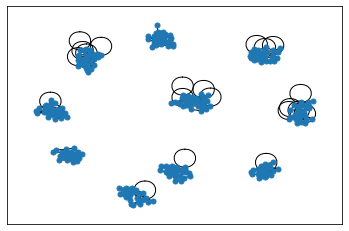

In [25]:
# visualise network of paired students

import networkx as nx
  
new_df_friends = pd.read_csv("new_df_friends.csv")

G_symmetric = nx.Graph()

for index, row in new_df_friends.iterrows():
    G_symmetric.add_edge(row["id"], row["friend1"])
    G_symmetric.add_edge(row["id"], row["friend2"])

nx.random_layout(G_symmetric)
nx.draw_networkx(G_symmetric, node_size = 25, with_labels = False)

In [60]:
# extract communities of students and add to list

from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G_symmetric, resolution = 4)) # resolution changes size of groups/wishes granted

print(len(sorted(c[0])))

32


In [61]:
# check percentage of wishes granted

id1 = list(new_df_friends["id"])
id2 = list(new_df_friends["friend1"])
id3 = list(new_df_friends["friend2"])

ideal_groups = [*map(list, zip(id1, id2, id3))]

x = 0

for community in c:
    for group in ideal_groups:    
        if(set(group).issubset(set(community))):
            x += 1

print(x)
print(x / len(ideal_groups) * 100)
        

245
81.66666666666667


In [27]:
# turn each community of students into one row in dataframe

def merge_students(df, list_sets):
    list_df = []
    for set_students in list_sets:
        mask = df["id"].isin(set_students)
        df_set = df.loc[mask]
        temp_df = pd.DataFrame({"id": [set_students],
                                "number_students": [len(set_students)],
                                "gender_int": [round(df_set["gender_int"].mean(), 1)],
                                "color_int": [round(df_set["color_int"].mean(), 1)],
                                "reading_int": [round(df_set["reading_int"].mean(), 1)],
                                "hobby_int": [round(df_set["hobby_int"].mean(), 1)],
                                "language_int": [round(df_set["language_int"].mean(), 1)],
                                "introverted_int": [round(df_set["introverted_int"].mean(), 1)],
                                "siblings": [round(df_set["siblings"].mean(), 1)],
                                "city_int": [round(df_set["city_int"].mean(), 1)]})
        list_df.append(temp_df)
    merged_communities = pd.concat(list_df, ignore_index=True)
    return merged_communities
        
df_merged_students = merge_students(new_df_friends, c)
df_merged_students.head()


,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,city_int
0,"(224, 2, 3, 36, 262, 268, 51, 220, 94)",9,0.0,3.0,1.8,1.3,1.9,0.2,1.9,2.0
1,"(64, 99, 163, 299, 81, 242, 145, 187, 126)",9,1.0,2.3,1.7,2.2,2.3,0.4,1.8,4.0
2,"(129, 130, 171, 12, 245, 22, 87, 92)",8,1.0,2.6,1.2,1.5,1.8,0.4,2.4,0.0
3,"(33, 205, 13, 46, 152, 217, 154, 62)",8,1.0,2.6,1.2,2.1,2.8,0.8,2.5,0.0
4,"(39, 11, 76, 174, 143, 210, 119, 122)",8,1.0,2.1,1.8,2.6,2.4,0.6,2.2,0.0


## k-means clustering of student groups

Text(0, 0.5, 'Sum of Squared Distances')

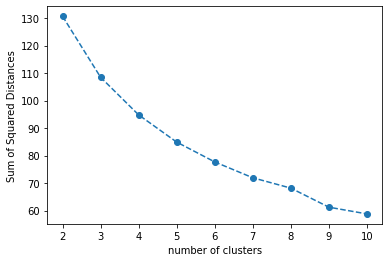

In [28]:
# find ideal number of clusters for k-means clustering

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


list_inertia = []

for i in range(2, 11):
    
    model=KMeans(n_clusters=i, random_state=42)
    model.fit(df_merged_students[["gender_int", "color_int", "reading_int", "hobby_int", "language_int", 
                                  "introverted_int", "siblings", "city_int"]])
    
    list_inertia.append(model.inertia_)

plt.plot(range(2,11), list_inertia, 'o--')
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Distances')

# maybe the number of clusters should always be twice the number of schools 
# because there's usually one cluster of boys and one of girls at each school?

In [29]:
# make sklearn pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

k = 10
kmeans = KMeans(n_clusters=k)

pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(df_merged_students[["gender_int", "color_int", "reading_int", "hobby_int", "language_int",
                                 "introverted_int", "siblings", "city_int"]])

labels = pipeline.predict(df_merged_students[["gender_int", "color_int", "reading_int", "hobby_int", "language_int", 
                                              "introverted_int", "siblings", "city_int"]])



In [30]:
#add clusters to dataframe

df_merged_students["clusters"] = kmeans.labels_
df_merged_students.head()

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,city_int,clusters
0,"(224, 2, 3, 36, 262, 268, 51, 220, 94)",9,0.0,3.0,1.8,1.3,1.9,0.2,1.9,2.0,0
1,"(64, 99, 163, 299, 81, 242, 145, 187, 126)",9,1.0,2.3,1.7,2.2,2.3,0.4,1.8,4.0,6
2,"(129, 130, 171, 12, 245, 22, 87, 92)",8,1.0,2.6,1.2,1.5,1.8,0.4,2.4,0.0,2
3,"(33, 205, 13, 46, 152, 217, 154, 62)",8,1.0,2.6,1.2,2.1,2.8,0.8,2.5,0.0,2
4,"(39, 11, 76, 174, 143, 210, 119, 122)",8,1.0,2.1,1.8,2.6,2.4,0.6,2.2,0.0,2


In [31]:
# make one dataframe for each cluster and add to list

def create_clustered_dataframes(df):
    dataframes_list = []
    for i in df.clusters.unique():
        temporary_df = df[df["clusters"] == i]
        dataframes_list.append(temporary_df)
    return dataframes_list

list_df_clustered = create_clustered_dataframes(df_merged_students)
list_df_clustered[0]

,id,number_students,gender_int,color_int,reading_int,hobby_int,language_int,introverted_int,siblings,city_int,clusters
0,"(224, 2, 3, 36, 262, 268, 51, 220, 94)",9,0.0,3.0,1.8,1.3,1.9,0.2,1.9,2.0,0
8,"(256, 194, 131, 290, 120, 138, 298, 285)",8,0.0,2.2,2.0,1.1,2.8,0.4,1.8,2.0,0
11,"(195, 228, 134, 295, 27, 157, 191)",7,0.0,1.0,1.7,1.3,2.1,0.3,2.4,0.0,0
13,"(257, 273, 165, 6, 151, 202, 29)",7,0.0,2.9,1.7,1.3,2.3,0.3,2.0,0.0,0
18,"(16, 225, 176, 182, 230, 221, 254)",7,0.0,2.6,1.9,1.6,3.0,0.6,1.4,3.0,0
35,"(272, 20, 53, 233, 173)",5,0.0,3.0,1.8,0.8,2.8,0.2,1.0,1.0,0


In [29]:
import binpacking

b = {'a':10, 'b':10, 'c':11, 'd':1, 'e':2,'f':7}
bins = binpacking.to_constant_bin_number(b,4) # 4 being the bin number
print(bins)

[{'c': 11}, {'a': 10}, {'b': 10}, {'f': 7, 'e': 2, 'd': 1}]


In [30]:
b = list(b.values())
bins = binpacking.to_constant_volume(b,11) # 11 being the bin volume
print(bins)

[[11], [10, 1], [10], [7, 2]]
